# NAME : RUTVIK PRAJAPATI 
# STUDENT ID: C0909130
# ASSIGNMENT 1 

In [14]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')   # loading the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.info()   # Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


There are no null values in any of the columns. Also the datatypes are correct

In [18]:
df.describe()   # Descriptive summary

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [19]:
df.duplicated().sum()   # Finding duplicate records 

0

There are no duplicated rows in any of the columns as well

In [20]:
df['Classes'].value_counts()  # Counting records in each classes

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

There are some duplicate values in the Class column

In [22]:
df['Classes'] = df['Classes'].str.strip()    # Striping trailing spaces

In [23]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

The dataset is not imbalanced so no need to balance it

In [24]:
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})   # Converting Target variable values into numerical values

In [25]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

## Data Visualization

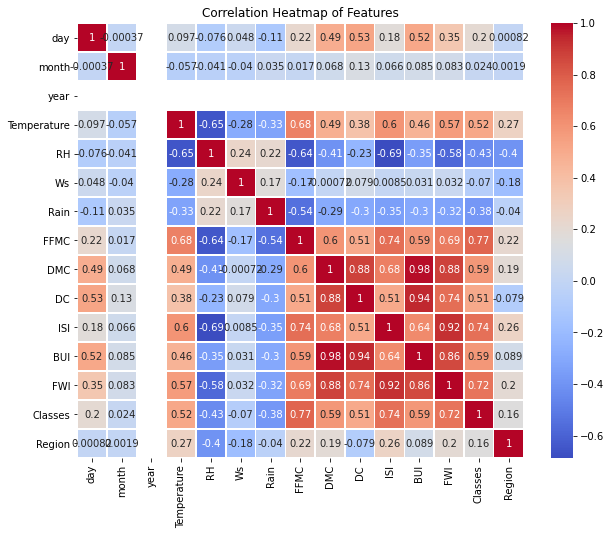

In [26]:
# 1. Displaying a correlation heatmap of all the features with each other
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Column like 'DMC' and 'BUI', 'BUI' and 'DC', 'FWI' and 'ISI', 'DMC' and 'DC', 'DMC' and 'FWI', 'BUI' and 'FWI' are highly positively correlated that means we don't need all these columns and we can reduce multi-collinearity

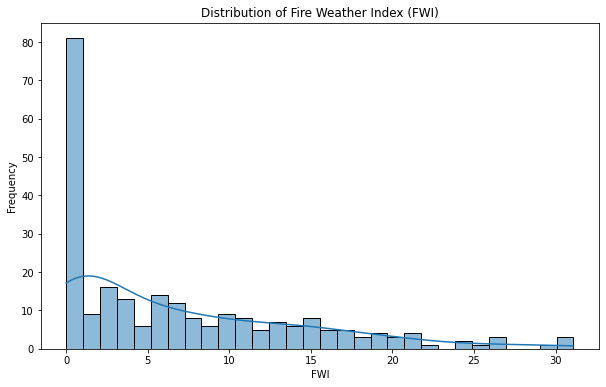

In [46]:
# 2. Histogram of Fire Weather Index
plt.figure(figsize=(10, 6))
sns.histplot(data['FWI'], bins=30, kde=True)
plt.title('Distribution of Fire Weather Index (FWI)')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

The histogram of the Fire Weather Index (FWI) shows a right-skewed distribution, with most values concentrated between 0 and 5, indicating low fire risk conditions are common. The presence of occasional higher values, up to around 30, suggests periods of elevated fire risk. The KDE line further highlights the overall trend of the data.

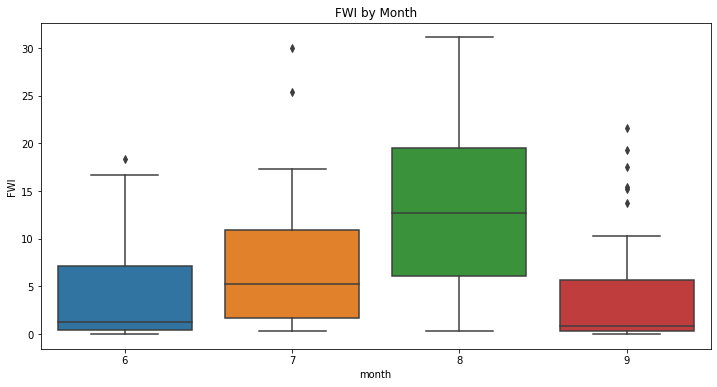

In [29]:
# 3. Box plot to analyze FWI by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='FWI', data=data)
plt.title('FWI by Month')
plt.show()

Insights:
- The FWI values vary significantly by month.
- Month 6 shows the lowest median FWI value and a smaller spread of data.
- Month 8 has the highest median FWI value and a larger spread, indicating more variability in fire weather conditions.
- Month 9 has a lower median FWI value compared to month 8 but higher than month 6, with some outliers indicating occasional high FWI values.

Overall, the plot provides a clear view of how FWI changes across these months, highlighting periods of higher fire weather risk.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Classes'])  
y = df['Classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # splitting the data

In [31]:
X_train

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
115,24,9,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,0
207,26,8,2012,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1
158,7,7,2012,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,5.2,1
132,11,6,2012,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1
84,24,8,2012,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,20.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,9,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0
14,15,6,2012,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0
92,1,9,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0
179,29,7,2012,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1


In [32]:
y_train

115    0
207    1
158    1
132    1
84     1
      ..
106    0
14     0
92     0
179    1
102    0
Name: Classes, Length: 194, dtype: int64

In [33]:
sc = StandardScaler()

# scaling the data with StandardScaler
X_train_sc = sc.fit_transform(X_train)  
X_test_sc = sc.transform(X_test)

## Model Building 

**1) Model Evaluation with all features**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

y_pred = lr.predict(X_test_sc)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Accuracy Score:\n{accuracy_score(y_test, y_pred)}")

Confusion Matrix:
[[20  2]
 [ 1 26]]
Accuracy Score:
0.9387755102040817


In [37]:
y_test.value_counts()

1    27
0    22
Name: Classes, dtype: int64

**This means we have only 1 FP and 2 FN. We've also got 93% accuracy with all the features**

**2) Model Evaluation with removal of less significant features**

In [38]:
X_imp = X.drop(columns=['day', 'month', 'year'])  # dropping less important features

In [39]:
# Splitting the data into train and test and scaling it
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)

X_train_imp_sc = sc.fit_transform(X_train_imp)   
X_test_imp_sc = sc.transform(X_test_imp)

In [40]:
lr.fit(X_train_imp_sc, y_train)

# model prediction with only important features
y_pred_imp = lr.predict(X_test_imp_sc)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_imp)}")
print(f"Accuracy Score:\n{accuracy_score(y_test, y_pred_imp)}")

Confusion Matrix:
[[20  2]
 [ 1 26]]
Accuracy Score:
0.9387755102040817


**We are getting same metrics with less features now**

3) Cross Validation and Hyperparameter Tuning (Includes Regularization using Tuning)

In [41]:
from sklearn.model_selection import GridSearchCV

# different parameter for cross-validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced', {0:1, 1:2}], # {0:1, 1:2} indicating twice the weightage for class 1 compared to class 0
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_imp_sc, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.9793522267206478


**Through Cross-Validation we have got the best parameter and an average accuracy score of 97%**

In [42]:
best_model = grid_search.best_estimator_  # storing best parameter into a variable
y_pred_best = best_model.predict(X_test_imp_sc)

# Evaluate the best model
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best)}")
print(f"Accuracy Score:\n{accuracy_score(y_test, y_pred_best)}")

Confusion Matrix:
[[21  1]
 [ 1 26]]
Accuracy Score:
0.9591836734693877


**Logistic Regression with parameter C=10, class_weight=None and Ridge regularization achieved highest 95% accuracy for this dataset**

## Storing Model's output into Pickle file

In [43]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)